In [28]:
#CORRELARE GLI STORICI COL PERIODO CHE HANNO STUDIATO

import rdflib
from rdflib import Namespace , Literal , URIRef
from rdflib.namespace import RDF , RDFS
import csv

# bind the uncommon namespaces
wd = Namespace("http://www.wikidata.org/entity/") # remember that a prefix matches a URI until the last slash (or hashtag #)
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")


# create an empty Graph
g = rdflib.ConjunctiveGraph()


# parse a local RDF file by specifying the format
result = g.parse("resources/artchives.nq", format='nquads')


    
query_result = g.query("""
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX wd: <http://www.wikidata.org/entity/>
    PREFIX wdt: <http://www.wikidata.org/prop/direct/>
    PREFIX art: <https://w3id.org/artchives/>
    SELECT DISTINCT ?Historian ?Period
    WHERE {
        ?collect wdt:P170 ?artHistorian ;
                    rdfs:label ?Collection ;
                    art:hasSubjectPeriod ?perio .
        ?perio rdfs:label ?Period .
        ?artHistorian rdfs:label ?Historian . 
    }
    GROUP BY ?Historian ?Period
    """)

with open('historian_periods.csv', 'wt') as out_file:
    csv_writer = csv.writer(out_file, delimiter=',' , quoting=csv.QUOTE_ALL)
    csv_writer.writerow(['Historian', 'Period'])
    for row in query_result:
        csv_writer.writerow([row.Historian.strip(), row.Period.lower().strip()]) #se metto row.name mi da i nomi dei paesi, ma non leva i doppioni
        
import pandas as pd
data = pd.read_csv('historian_periods.csv', encoding = 'latin-1', error_bad_lines=False)
# print the first 5 rows
data.head(30)


,Historian,Period
0,Ernst Kitzinger,byzantine art
1,Ernst Kitzinger,byzantine art
2,Ernst Kitzinger,byzantine art
3,Ernst Kitzinger,byzantine art
4,Ernst Kitzinger,byzantine art
5,Ernst Kitzinger,byzantine art
6,Ernst Kitzinger,byzantine art
7,Ernst Kitzinger,byzantine art
8,Ernst Kitzinger,byzantine art
9,Ernst Kitzinger,byzantine art


In [29]:
import csv
import pandas as pd


with open("historian_periods.csv") as csv_file:
    df = pd.read_csv(csv_file, delimiter=',', encoding = "latin-1")
print(df.head(20))

          Historian         Period
0   Ernst Kitzinger  byzantine art
1   Ernst Kitzinger  byzantine art
2   Ernst Kitzinger  byzantine art
3   Ernst Kitzinger  byzantine art
4   Ernst Kitzinger  byzantine art
5   Ernst Kitzinger  byzantine art
6   Ernst Kitzinger  byzantine art
7   Ernst Kitzinger  byzantine art
8   Ernst Kitzinger  byzantine art
9   Ernst Kitzinger  byzantine art
10  Ernst Kitzinger  byzantine art
11  Ernst Kitzinger  byzantine art
12  Ernst Kitzinger    middle ages
13  Ernst Kitzinger    middle ages
14  Ernst Kitzinger    middle ages
15  Ernst Kitzinger    middle ages
16  Ernst Kitzinger    middle ages
17  Ernst Kitzinger    middle ages
18  Ernst Kitzinger    middle ages
19  Ernst Kitzinger    middle ages


In [30]:
import pandas_profiling as pp
pp.ProfileReport(df.drop_duplicates('Historian', keep= 'last'))
pp.ProfileReport(df.drop_duplicates('Period', keep= 'last'))

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

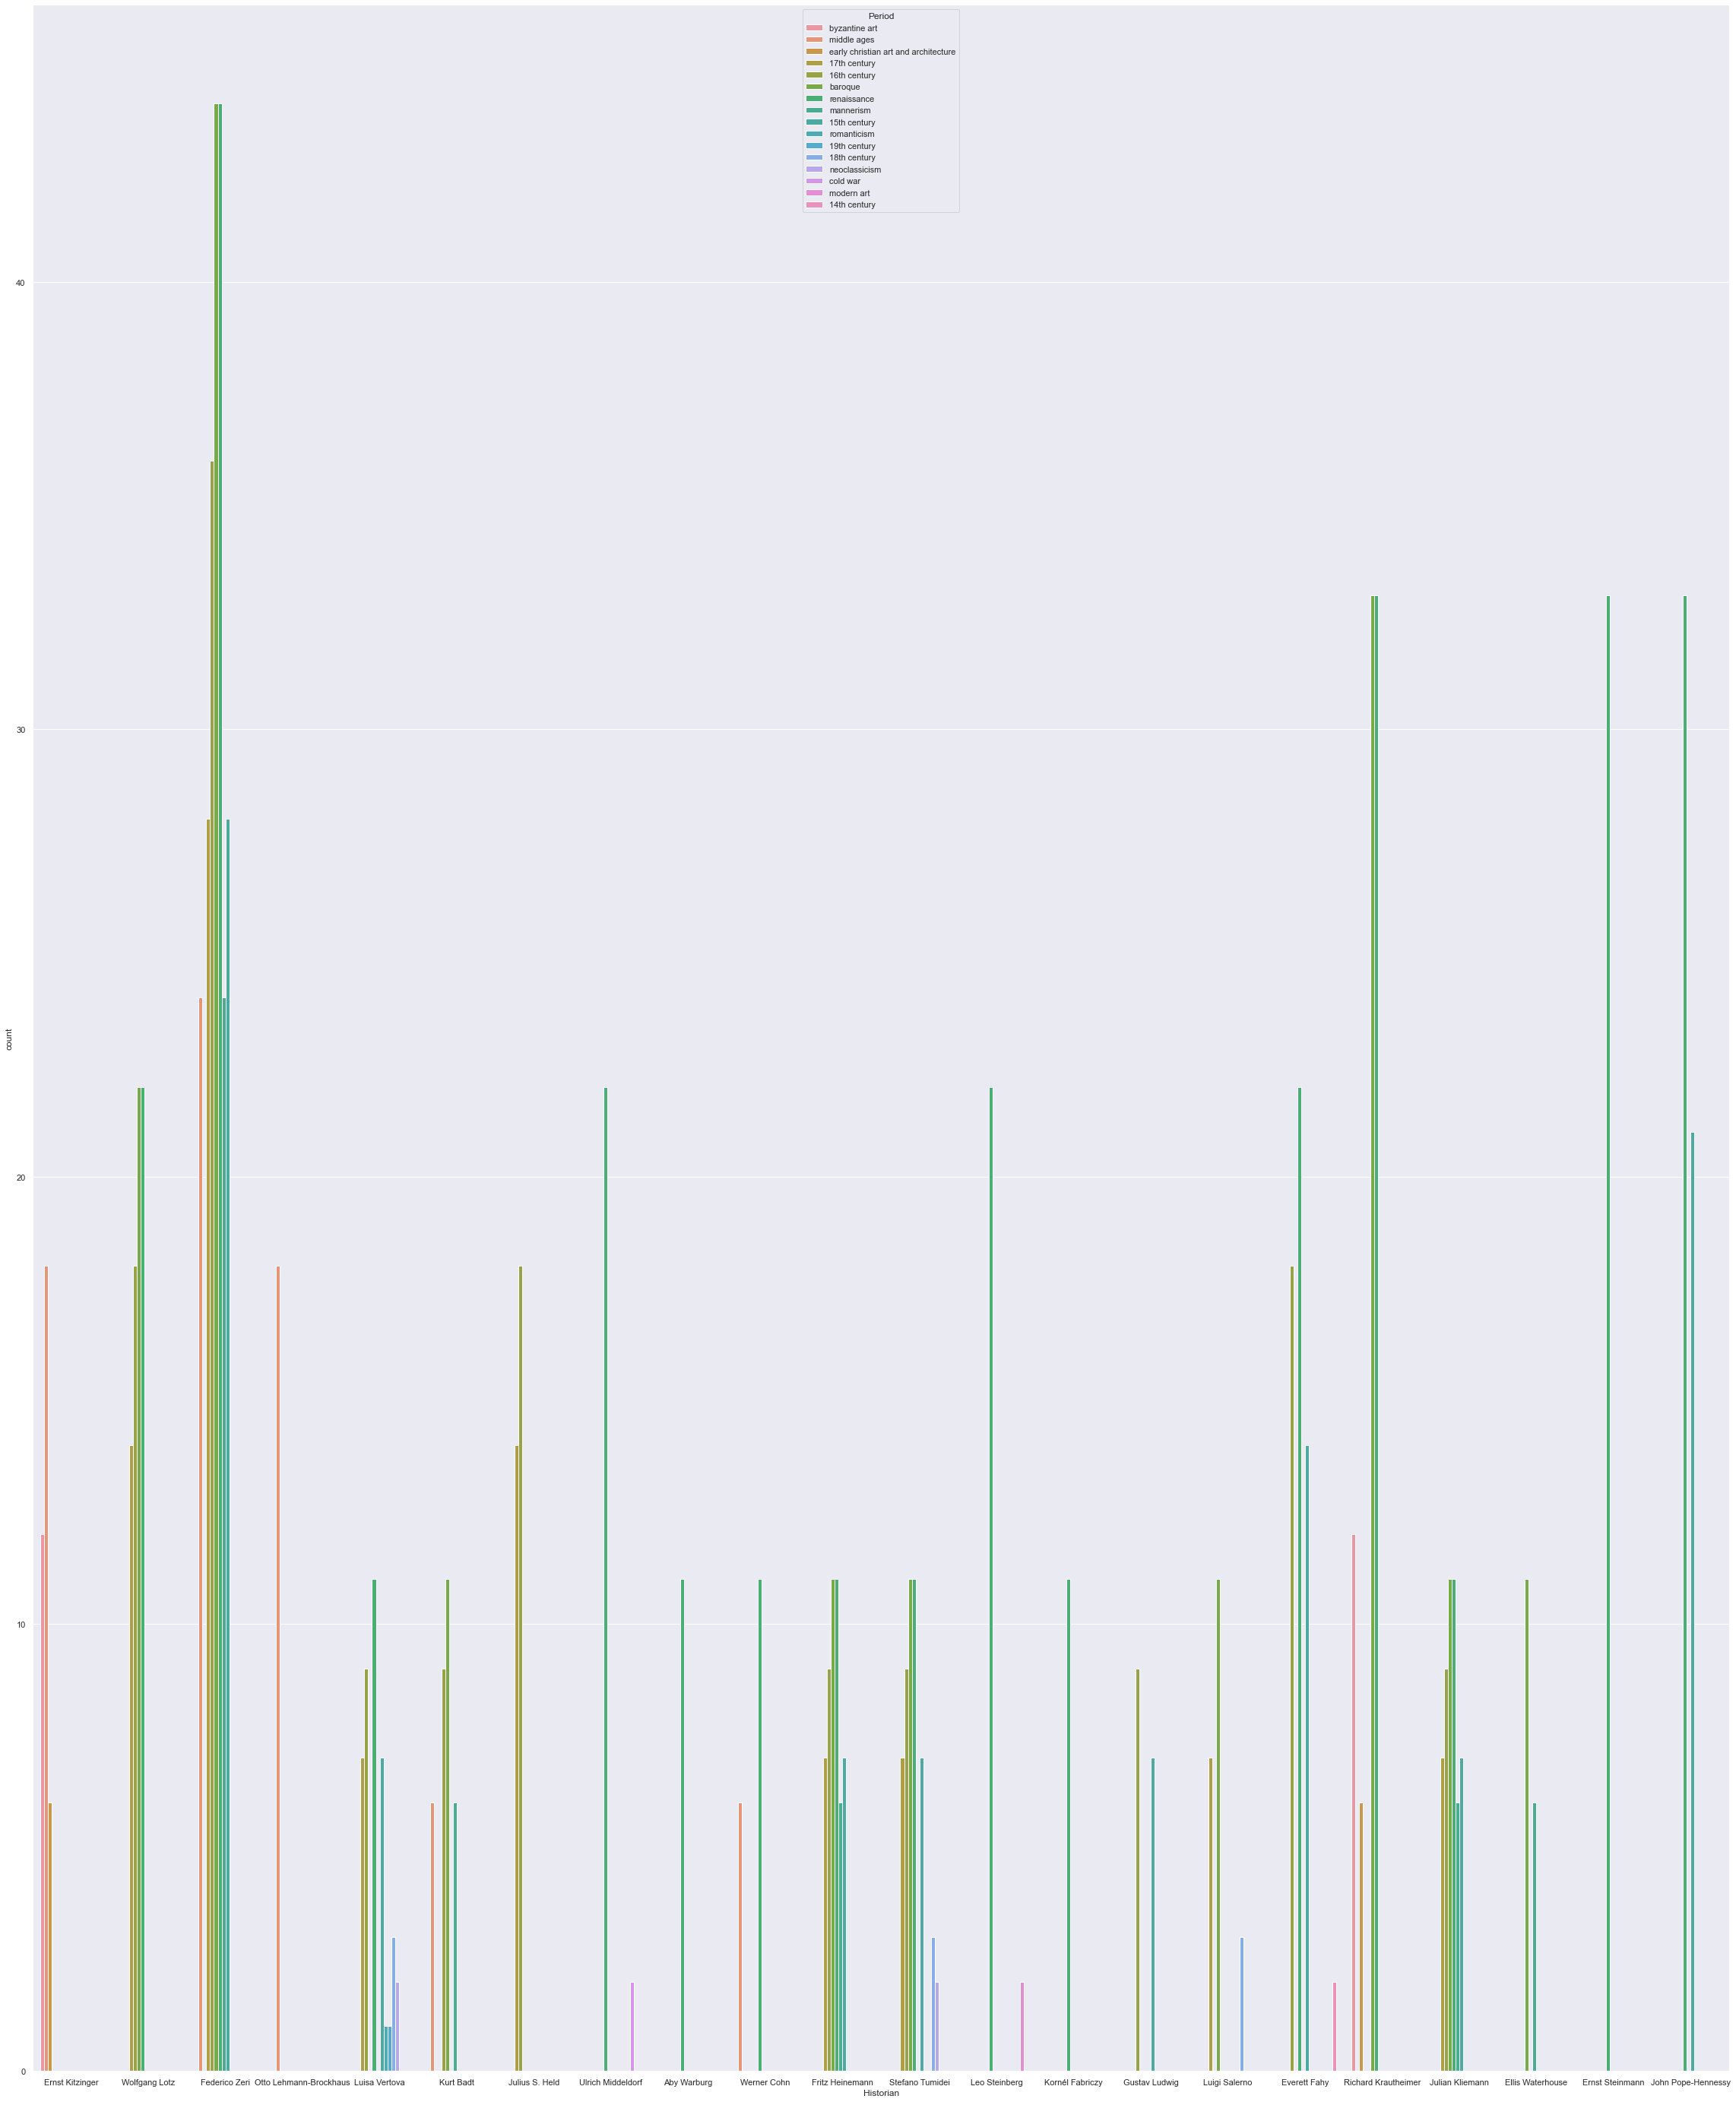

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
fig_dims = (40, 50)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x="Historian", hue="Period", data=df)

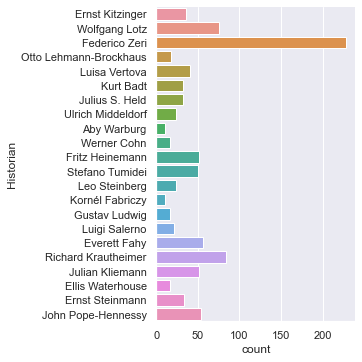

In [32]:
#plot the counting 
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()
ax = sns.catplot(y="Historian", kind= "count", data= df)

In [33]:
#SERVE LA MATRICE E LA VIZ BOKEH
import csv
from collections import defaultdict
import numpy as np
data = {} # final data
with open('historian_periods.csv') as csvfile:
    historians = [] 
    periods = []
    rows = csv.reader(csvfile, delimiter=',')
    next(rows) # skip the header
    for row in rows:
        if row[0] not in historians:
            historians.append(row[0]) # create the list of unique periods
        if row[1] not in periods:
            periods.append(row[1]) # create the list of unique periods
    print(historians)
    print(periods)
    periods.sort()
    periods_zeros_matrix = np.array(np.zeros(( len(periods), len(historians) ))) # rows, columns
    
    for i, histo in enumerate(historians): # loop over periods and their index position  
        for j, period in enumerate(periods):
            with open('historian_periods.csv') as csvfile:
                rows = csv.reader(csvfile, delimiter=',')
                for row in rows:
                    if row[1] == period and row[0] == histo:  
                        periods_zeros_matrix[j][i] = int(periods_zeros_matrix[j][i])+1
    
    periods_zeros_matrix
    
# put everything together
data["Historians"] = historians
for i, period in enumerate(periods):
    data[period] = list(periods_zeros_matrix[i])
print(data)

['Ernst Kitzinger', 'Wolfgang Lotz', 'Federico Zeri', 'Otto Lehmann-Brockhaus', 'Luisa Vertova', 'Kurt Badt', 'Julius S. Held', 'Ulrich Middeldorf', 'Aby Warburg', 'Werner Cohn', 'Fritz Heinemann', 'Stefano Tumidei', 'Leo Steinberg', 'Kornél Fabriczy', 'Gustav Ludwig', 'Luigi Salerno', 'Everett Fahy', 'Richard Krautheimer', 'Julian Kliemann', 'Ellis Waterhouse', 'Ernst Steinmann', 'John Pope-Hennessy']
['byzantine art', 'middle ages', 'early christian art and architecture', '17th century', '16th century', 'baroque', 'renaissance', 'mannerism', '15th century', 'romanticism', '19th century', '18th century', 'neoclassicism', 'cold war', 'modern art', '14th century']
{'Historians': ['Ernst Kitzinger', 'Wolfgang Lotz', 'Federico Zeri', 'Otto Lehmann-Brockhaus', 'Luisa Vertova', 'Kurt Badt', 'Julius S. Held', 'Ulrich Middeldorf', 'Aby Warburg', 'Werner Cohn', 'Fritz Heinemann', 'Stefano Tumidei', 'Leo Steinberg', 'Kornél Fabriczy', 'Gustav Ludwig', 'Luigi Salerno', 'Everett Fahy', 'Richard K

In [42]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
import random

output_file("bar_nested_colormapped_period_histo.html")

historians = ['Gustav Ludwig', 'Fritz Heinemann', 'Werner Cohn', 'Ulrich Middeldorf', 'Ernst Steinmann', 'Leo Steinberg', 'Wolfgang Lotz', 'Otto Lehmann-Brockhaus', 'Kurt Badt', 'Julius S. Held', 'Aby Warburg', 'Ellis Waterhouse', 'Stefano Tumidei', 'John Pope-Hennessy', 'Kornél Fabriczy', 'Richard Krautheimer', 'Ernst Kitzinger', 'Julian Kliemann', 'Federico Zeri', 'Everett Fahy', 'Luigi Salerno', 'Luisa Vertova']
periods = ['byzantine art', 'middle ages', 'early christian art and architecture', '17th century', '16th century', 'baroque', 'renaissance', 'mannerism', '15th century', 'romanticism', '19th century', '18th century', 'neoclassicism', 'cold war', 'modern art', '14th century']
data = {'Historians': ['Ernst Kitzinger', 'Wolfgang Lotz', 'Federico Zeri', 'Otto Lehmann-Brockhaus', 'Luisa Vertova', 'Kurt Badt', 'Julius S. Held', 'Ulrich Middeldorf', 'Aby Warburg', 'Werner Cohn', 'Fritz Heinemann', 'Stefano Tumidei', 'Leo Steinberg', 'Kornél Fabriczy', 'Gustav Ludwig', 'Luigi Salerno', 'Everett Fahy', 'Richard Krautheimer', 'Julian Kliemann', 'Ellis Waterhouse', 'Ernst Steinmann', 'John Pope-Hennessy'], '14th century': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0], '15th century': [0.0, 0.0, 28.0, 0.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 7.0, 0.0, 0.0, 7.0, 0.0, 14.0, 0.0, 7.0, 0.0, 0.0, 21.0], '16th century': [0.0, 18.0, 36.0, 0.0, 9.0, 9.0, 18.0, 0.0, 0.0, 0.0, 9.0, 9.0, 0.0, 0.0, 9.0, 0.0, 18.0, 0.0, 9.0, 0.0, 0.0, 0.0], '17th century': [0.0, 14.0, 28.0, 0.0, 7.0, 0.0, 14.0, 0.0, 0.0, 0.0, 7.0, 7.0, 0.0, 0.0, 0.0, 7.0, 0.0, 0.0, 7.0, 0.0, 0.0, 0.0], '18th century': [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '19th century': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'baroque': [0.0, 22.0, 44.0, 0.0, 0.0, 11.0, 0.0, 0.0, 0.0, 0.0, 11.0, 11.0, 0.0, 0.0, 0.0, 11.0, 0.0, 33.0, 11.0, 11.0, 0.0, 0.0], 'byzantine art': [12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 0.0, 0.0, 0.0, 0.0], 'cold war': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'early christian art and architecture': [6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0], 'mannerism': [0.0, 0.0, 24.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 6.0, 0.0, 0.0], 'middle ages': [18.0, 0.0, 24.0, 18.0, 0.0, 6.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'modern art': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'neoclassicism': [0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'renaissance': [0.0, 22.0, 44.0, 0.0, 11.0, 0.0, 0.0, 22.0, 11.0, 11.0, 11.0, 11.0, 22.0, 11.0, 0.0, 0.0, 22.0, 33.0, 11.0, 0.0, 33.0, 33.0], 'romanticism': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}

number_of_colors = 18 # pick random colors for the countries
palette = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

# this creates [ ("Apples", "2015"), ("Apples", "2016"), ("Apples", "2017"), ("Pears", "2015), ... ]
x = [ (historian, period) for historian in historians for period in periods ]
counts = sum(zip(data['byzantine art'], data['middle ages'], data['early christian art and architecture'], data['17th century'], data['16th century'], data['baroque'], data['renaissance'], data['mannerism'], data['15th century'], data['romanticism'], data['19th century'], data['18th century'], data['neoclassicism'], data['cold war'], data['modern art'], data['14th century']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=650, width=4000, title="Period Counts by Historian",
           toolbar_location=None, tools="")

p.vbar(x='x', top='counts', width=0.9, source=source, line_color="white",
       fill_color=factor_cmap('x', palette=palette, factors=periods, start=1, end=2))

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1.55
p.xgrid.grid_line_color = None

show(p)



In [51]:
#CORRELARE LE COLLEZIONI AI KEEPER

import rdflib
from rdflib import Namespace , Literal , URIRef
from rdflib.namespace import RDF , RDFS
import csv

# bind the uncommon namespaces
wd = Namespace("http://www.wikidata.org/entity/") # remember that a prefix matches a URI until the last slash (or hashtag #)
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")


# create an empty Graph
g = rdflib.ConjunctiveGraph()


# parse a local RDF file by specifying the format
result = g.parse("resources/artchives.nq", format='nquads')


    
query_result = g.query("""
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX wd: <http://www.wikidata.org/entity/>
    PREFIX wdt: <http://www.wikidata.org/prop/direct/>
    PREFIX art: <https://w3id.org/artchives/>
    SELECT DISTINCT ?Collection ?Keeper
    WHERE {
         ?keep a wd:Q31855 ; 
                 rdfs:label ?Keeper .
        ?collect wdt:P170 ?artHistorian .
        ?collect rdfs:label ?Collection .
        ?artHistorian rdfs:label ?Historian . 
    }
    GROUP BY ?Collection ?Keeper
    """)

with open('collection_keeper.csv', 'w') as out_file:
    csv_writer = csv.writer(out_file, delimiter=',' , quoting=csv.QUOTE_ALL)
    csv_writer.writerow(['Collection', 'Keeper'])
    for Collection, Keeper in query_result:
        csv_writer.writerow([Collection.strip(), Keeper.strip()]) #se metto row.name mi da i nomi dei paesi, ma non leva i doppioni
        
import pandas as pd
data = pd.read_csv('collection_keeper.csv', encoding = 'latin-1', error_bad_lines=False)
# print the first 5 rows
data.head(30)

,Collection,Keeper
0,Battisti Eugenio (complex of fonds),Getty Research Institute
1,Julius S. Held papers,Getty Research Institute
2,Leo Steinberg research papers,Getty Research Institute
3,Nachlass Otto Lehmann-Brockhaus,Getty Research Institute
4,Nachlass Cornelius von Fabriczy,Getty Research Institute
5,Fototeca Stefano Tumidei,Getty Research Institute
6,Fototeca Fahy,Getty Research Institute
7,John Pope-Hennessy papers,Getty Research Institute
8,Ellis K. Waterhouse notebooks and research files,Getty Research Institute
9,Gustav Ludwig-VermÃ¤chtnis,Getty Research Institute


In [52]:
import csv
import pandas as pd


with open("collection_keeper.csv") as csv_file:
    df = pd.read_csv(csv_file, delimiter=',', encoding = "latin-1")
print(df.head(20))

                                          Collection                    Keeper
0                Battisti Eugenio (complex of fonds)  Getty Research Institute
1                              Julius S. Held papers  Getty Research Institute
2                      Leo Steinberg research papers  Getty Research Institute
3                    Nachlass Otto Lehmann-Brockhaus  Getty Research Institute
4                    Nachlass Cornelius von Fabriczy  Getty Research Institute
5                           Fototeca Stefano Tumidei  Getty Research Institute
6                                      Fototeca Fahy  Getty Research Institute
7                          John Pope-Hennessy papers  Getty Research Institute
8   Ellis K. Waterhouse notebooks and research files  Getty Research Institute
9                          Gustav Ludwig-Vermächtnis  Getty Research Institute
10                              Nachlass Werner Cohn  Getty Research Institute
11                        Nachlass Ulrich Middeldorf

In [54]:
import pandas_profiling as pp
pp.ProfileReport(df.drop_duplicates('Collection', keep= 'last'))
pp.ProfileReport(df.drop_duplicates('Keeper', keep= 'last'))

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

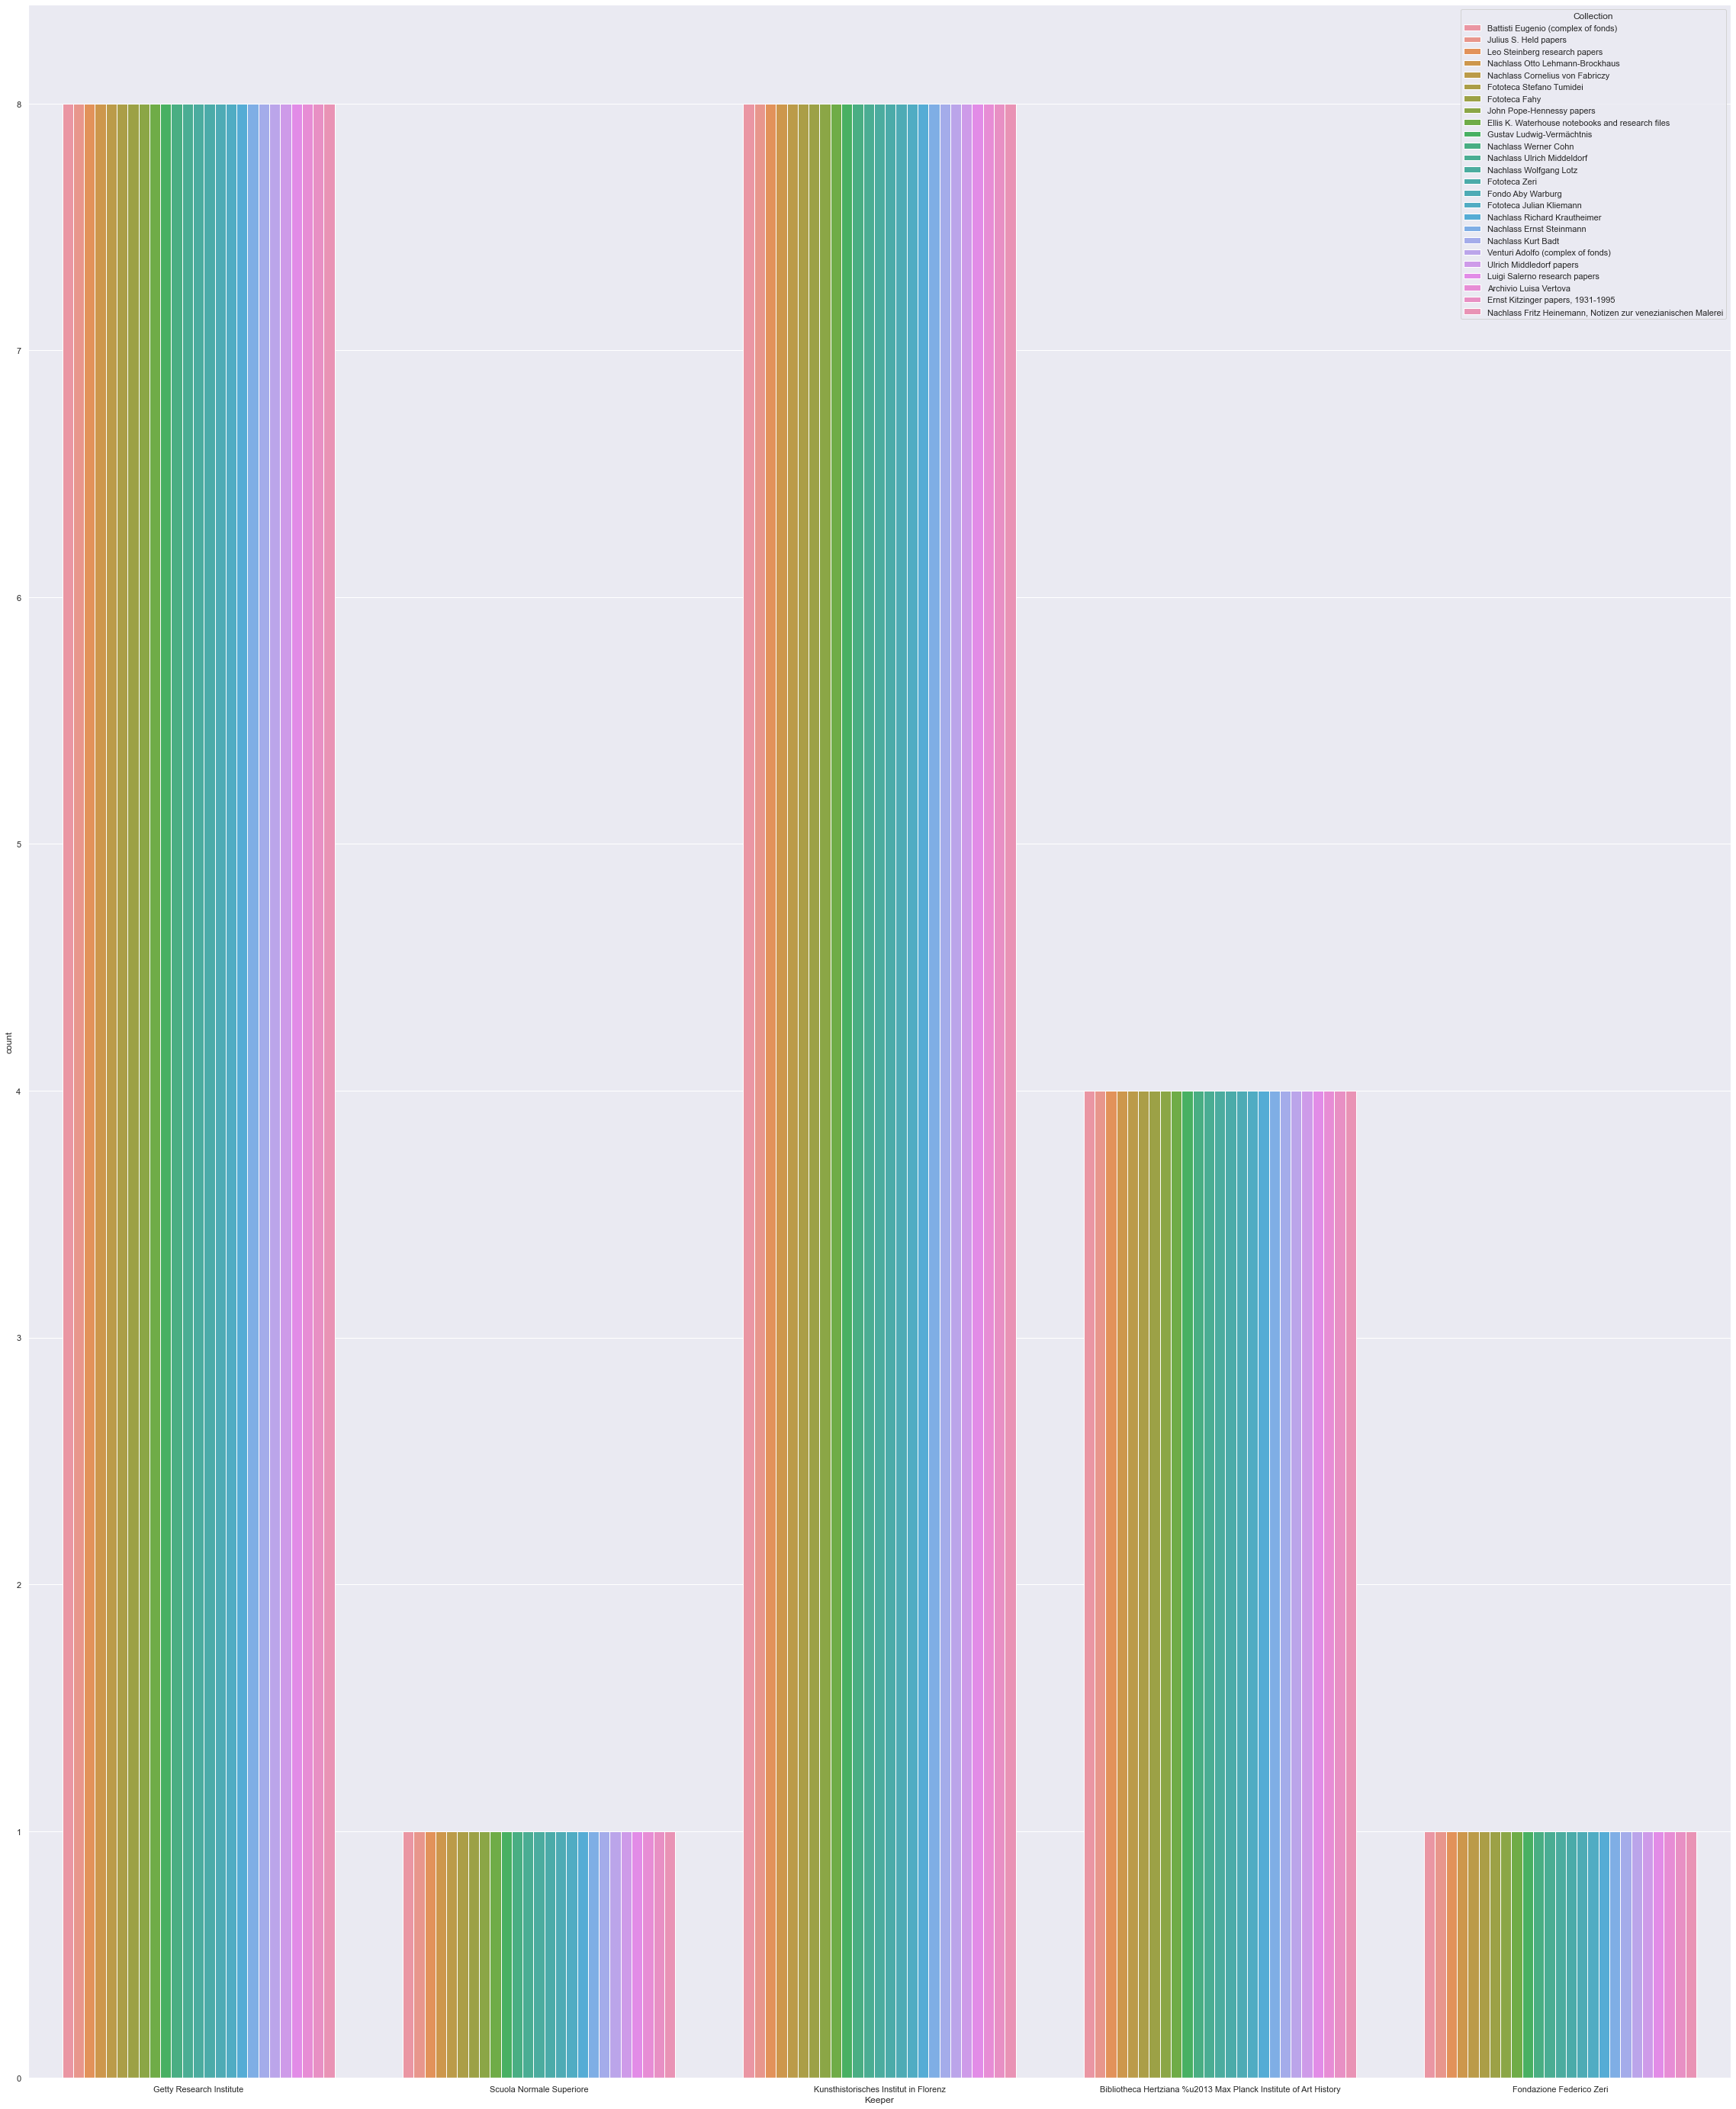

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
fig_dims = (40, 50)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x="Keeper", hue="Collection", data=df)

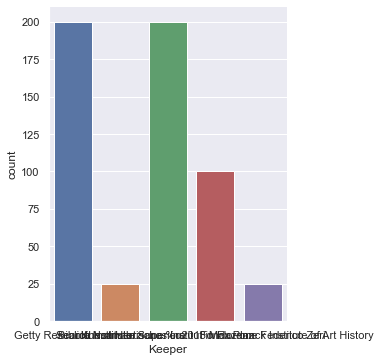

In [70]:
#plot the counting MA FA SCHIFO e non ho capito cosa rappresenta! il numero di cosa?
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()

ax = sns.catplot(x="Keeper", kind= "count", data= df)


In [71]:
#VENGONO TUTTI CON LO STESSO NUMERO QUINDO BOH
import csv
from collections import defaultdict
import numpy as np
data = {} # final data
with open('collection_keeper.csv') as csvfile:
    historians = [] 
    periods = []
    rows = csv.reader(csvfile, delimiter=',')
    next(rows) # skip the header
    for row in rows:
        if row[0] not in historians:
            historians.append(row[0]) # create the list of unique periods
        if row[1] not in periods:
            periods.append(row[1]) # create the list of unique periods
    print(historians)
    print(periods)
    periods.sort()
    periods_zeros_matrix = np.array(np.zeros(( len(periods), len(historians) ))) # rows, columns
    
    for i, histo in enumerate(historians): # loop over periods and their index position  
        for j, period in enumerate(periods):
            with open('collection_keeper.csv') as csvfile:
                rows = csv.reader(csvfile, delimiter=',')
                for row in rows:
                    if row[1] == period and row[0] == histo:  
                        periods_zeros_matrix[j][i] = int(periods_zeros_matrix[j][i])+1
    
    periods_zeros_matrix
    
# put everything together
data["Historians"] = historians
for i, period in enumerate(periods):
    data[period] = list(periods_zeros_matrix[i])
print(data)

['Battisti Eugenio (complex of fonds)', 'Julius S. Held papers', 'Leo Steinberg research papers', 'Nachlass Otto Lehmann-Brockhaus', 'Nachlass Cornelius von Fabriczy', 'Fototeca Stefano Tumidei', 'Fototeca Fahy', 'John Pope-Hennessy papers', 'Ellis K. Waterhouse notebooks and research files', 'Gustav Ludwig-Vermächtnis', 'Nachlass Werner Cohn', 'Nachlass Ulrich Middeldorf', 'Nachlass Wolfgang Lotz', 'Fototeca Zeri', 'Fondo Aby Warburg', 'Fototeca Julian Kliemann', 'Nachlass Richard Krautheimer', 'Nachlass Ernst Steinmann', 'Nachlass Kurt Badt', 'Venturi Adolfo (complex of fonds)', 'Ulrich Middledorf papers', 'Luigi Salerno research papers', 'Archivio Luisa Vertova', 'Ernst Kitzinger papers, 1931-1995', 'Nachlass Fritz Heinemann, Notizen zur venezianischen Malerei']
['Getty Research Institute', 'Scuola Normale Superiore', 'Kunsthistorisches Institut in Florenz', 'Bibliotheca Hertziana %u2013 Max Planck Institute of Art History', 'Fondazione Federico Zeri']
{'Historians': ['Battisti Euge

In [76]:
#VINE SEMPRE LA STESSA VISUALIZZAZIONE CON NUMERI UGUALI, LE BARRE SONO UGUALI IN OGNI GRUPPO
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
import random

output_file("bar_nested_colormapped_coll_keep.html")

historians = ['Battisti Eugenio (complex of fonds)', 'Julius S. Held papers', 'Leo Steinberg research papers', 'Nachlass Otto Lehmann-Brockhaus', 'Nachlass Cornelius von Fabriczy', 'Fototeca Stefano Tumidei', 'Fototeca Fahy', 'John Pope-Hennessy papers', 'Ellis K. Waterhouse notebooks and research files', 'Gustav Ludwig-Vermächtnis', 'Nachlass Werner Cohn', 'Nachlass Ulrich Middeldorf', 'Nachlass Wolfgang Lotz', 'Fototeca Zeri', 'Fondo Aby Warburg', 'Fototeca Julian Kliemann', 'Nachlass Richard Krautheimer', 'Nachlass Ernst Steinmann', 'Nachlass Kurt Badt', 'Venturi Adolfo (complex of fonds)', 'Ulrich Middledorf papers', 'Luigi Salerno research papers', 'Archivio Luisa Vertova', 'Ernst Kitzinger papers, 1931-1995', 'Nachlass Fritz Heinemann, Notizen zur venezianischen Malerei']
periods = ['Getty Research Institute', 'Scuola Normale Superiore', 'Kunsthistorisches Institut in Florenz', 'Bibliotheca Hertziana %u2013 Max Planck Institute of Art History', 'Fondazione Federico Zeri']
data = {'Historians': ['Battisti Eugenio (complex of fonds)', 'Julius S. Held papers', 'Leo Steinberg research papers', 'Nachlass Otto Lehmann-Brockhaus', 'Nachlass Cornelius von Fabriczy', 'Fototeca Stefano Tumidei', 'Fototeca Fahy', 'John Pope-Hennessy papers', 'Ellis K. Waterhouse notebooks and research files', 'Gustav Ludwig-Vermächtnis', 'Nachlass Werner Cohn', 'Nachlass Ulrich Middeldorf', 'Nachlass Wolfgang Lotz', 'Fototeca Zeri', 'Fondo Aby Warburg', 'Fototeca Julian Kliemann', 'Nachlass Richard Krautheimer', 'Nachlass Ernst Steinmann', 'Nachlass Kurt Badt', 'Venturi Adolfo (complex of fonds)', 'Ulrich Middledorf papers', 'Luigi Salerno research papers', 'Archivio Luisa Vertova', 'Ernst Kitzinger papers, 1931-1995', 'Nachlass Fritz Heinemann, Notizen zur venezianischen Malerei'], 'Bibliotheca Hertziana %u2013 Max Planck Institute of Art History': [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0], 'Fondazione Federico Zeri': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'Getty Research Institute': [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0], 'Kunsthistorisches Institut in Florenz': [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0], 'Scuola Normale Superiore': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}
number_of_colors = 18 # pick random colors for the countries
palette = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

# this creates [ ("Apples", "2015"), ("Apples", "2016"), ("Apples", "2017"), ("Pears", "2015), ... ]
x = [ (historian, period) for historian in historians for period in periods ]
counts = sum(zip(data['Getty Research Institute'], data['Scuola Normale Superiore'], data['Kunsthistorisches Institut in Florenz'], data['Bibliotheca Hertziana %u2013 Max Planck Institute of Art History'], data['Fondazione Federico Zeri']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=650, width=7000, title="Collection Counts by Keeper",
           toolbar_location=None, tools="")

p.vbar(x='x', top='counts', width=0.9, source=source, line_color="white",
       fill_color=factor_cmap('x', palette=palette, factors=periods, start=1, end=2))

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1.55
p.xgrid.grid_line_color = None

show(p)